In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Получите и загрузите данные.

In [85]:
data = pd.read_csv('train.csv')

### Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [86]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data = data.dropna()

In [88]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [89]:
Y = data['Survived']
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [90]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6744186046511628

### Снова загрузите полные данные.
### Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [91]:
data = pd.read_csv('train.csv')
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex']]
(data.isna().mean() * 100).round(2)

Survived     0.00
Pclass       0.00
Age         19.87
SibSp        0.00
Parch        0.00
Sex          0.00
dtype: float64

### Проверьте данные на наличие пропущенных значений.
### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [92]:
data.info()
print('Процент утерянных данных при удалении пропусков: ', 100 - 71400 / 891)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Sex       891 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB
Процент утерянных данных при удалении пропусков:  19.86531986531986


In [93]:
data['Age'].fillna(data.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace = True)
data

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,male
1,1,1,38.0,1,0,female
2,1,3,26.0,0,0,female
3,1,1,35.0,1,0,female
4,0,3,35.0,0,0,male
...,...,...,...,...,...,...
886,0,2,27.0,0,0,male
887,1,1,19.0,0,0,female
888,0,3,21.5,1,2,female
889,1,1,26.0,0,0,male


### Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

### ??? "Нет работы с категориальными признаками" ???

In [94]:
le = LabelEncoder()
le.fit( data['Sex'] )
data['Sex'] = le.transform( data['Sex'] )

### Проверьте данные на наличие выбросов.
### a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

<AxesSubplot:>

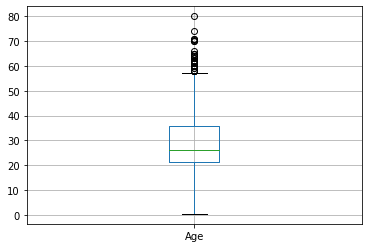

In [95]:
data[['Age']].boxplot()

In [96]:
data.Age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [97]:
print(data.SibSp.unique())
print(data.Parch.unique())
print(data.Pclass.unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
[3 1 2]


In [98]:
Y = data['Survived']
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex']]

### Обосновываю.
### В колонке возраст нет данных, которые казутся ошибочными. Дробные числа < 1 - возможная попытка занести в качестве данных возраст малышей до года, которые живут всего несколько месяцев и логично, что их возраст будет отношением колиечства прожитых месяцев к 12 - то есть дробное число. Далее, класс кабины, количество сестёр, братьев и родителей - всё это принимает вполне допустимые значения, что видно по массиву уникальных значений для каждого соответствующего столбца. Поэтому я считаю, что выбросов как таковых нет и чистить данные от них не нужно.

### Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

### (Не забывайте про масштабирование признаков для линейных моделей, здесь это вряд ли очень сильно влияет, но лишним не будет)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.835820895522388

## Выводы: 
### 1) Для построения модели не использовались бесполезные признаки по типу номера кабины, места посадки и т.д., так как логически эти признаки не могут влиять фактор выживаемости. Во второй части работы, когда пропущенные значения заполнялись по какому-то правилу, не все категориальные признаки выбрасывались, метрика качества стала равна 0.823 против 0.6465 в первом случае. Значит, работа была проделана не зря, и работа с проблемными данными имеет смысл.
### 2) Работа с данными при построении моделей вполне целесообразна, так как позволяет сохранить данные с самостоятельно заполненными пропусками для одного из признаков, вместо их удаления. Это позволяет в какой-то мере сохранить обширность выборки по сравнению с очищенными путём удаления пропусков данными, что негативно влияет на точность модели.
### 3) Я считаю, что на вопрос об однозначной целесообразности подобного исследования для действительно больших данных нельзя сказать так однозначно. Для заполнения реально больших данных понадобится больше времени на первичный условно говоря анализ, вычислительные процессы и т.д. Всё зависит от самих данных: если при обычном удалении данных с пропусками каждая представленная группа(категория) в данных всё равно будет представлена  в достаточном количестве, их соотношение примерно равно и общее количество не сильно уступает изначальному, то заполнение не имеет смысла. Если же количество данных сильно сократилось, или какая-то группа почти полностью исчезла из выборки и нарушилось соотношение, то подобную работу однозначно стоит делать. Для выбора одной из двух стратегий обязателен первичный анализ представленных данных.

///////////////////////////////////////////////////////////////////////////////////////////////////////////

### " 'бесполезные признаки по типу номера кабины, места посадки и т.д.' - хотелось бы увидеть подтверждение или опровержение этого утверждения численно "

In [100]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
data.drop(columns = ['Cabin'], inplace = True)

In [102]:
data.drop(columns = ['Fare'], inplace = True)

In [103]:
data.drop(columns = ['Name'], inplace = True)

In [104]:
data.dropna(subset = ['Embarked'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 69.5+ KB


In [105]:
data['Age'].fillna(data.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace = True)

In [106]:
data = pd.get_dummies(data, columns = ['Embarked', 'Ticket'])

In [107]:
le = LabelEncoder()
le.fit( data['Sex'] )
data['Sex'] = le.transform( data['Sex'] )

In [108]:
Y = data['Survived']
X = data.drop(columns = 'Survived')

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7902621722846442

### Что и требовалось доказать.